# Sklearn and Tensorflow comparison

* Task: Take some example from everyday life and do a work comparing the results returned by TensorFlow and by Sklearn.

### For this work I am going to create a linear regression model to predict the price of houses using the two libraries and comparing the results. 

### Sklearn

In [1]:
#Import necessary libraries
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

In [2]:
#Load the dataset
data = load_boston()

#Check the dataset
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
#convert to dataframe using pandas
df=pd.DataFrame(data.data, columns=data.feature_names)
df['price']=data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


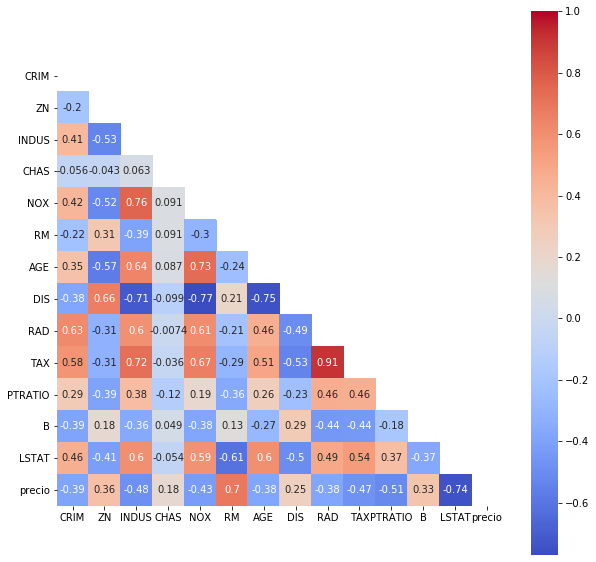

In [4]:
# Check correlation between variables
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, square=True, mask=mask, cmap='coolwarm')
plt.show()

In [60]:
#Split the df in dependent and independent variables
X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = df['price']

In [61]:
#Split the variables into training and testing. 80% for training and the rest for testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)
print("The number of training samples is  :", X_train.shape[0])
print("The number of testing samples is :", X_test.shape[0])

The number of training samples is  : 404
The number of testing samples is : 102


In [62]:
# Normalize the set to get better predictions
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
# Import Sklearn linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [64]:
#Pass train set to the model so it can 'learn'
lm.fit(X_train,y_train)

#Make predictions
y_pred=lm.predict(X_test)

In [65]:
# Calculate mean absolute error using sklearn.metrics
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

print(
    f'The normalized mean absolute error is:  {(mae/y_test.mean()*100):.2f}%')

The normalized mean absolute error is:  16.61%


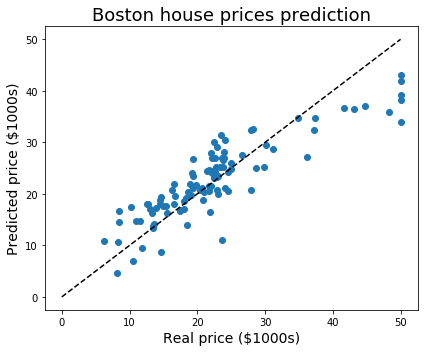

In [14]:
# Plot predictions
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.title('Boston house prices prediction', fontsize=18)
plt.xlabel('Real price ($1000s)', fontsize=14)
plt.ylabel('Predicted price ($1000s)', fontsize=14)
plt.tight_layout()

In [36]:
# Again but using the variables that have more correlation with the price. 
X = df[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
y = df['price']

In [37]:
# Split variables
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

In [38]:
# Normalize
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
#Fit model
lm.fit(X_train,y_train)

#Predict
y_pred=lm.predict(X_test)

In [40]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

print(f'The normalized mean absolute error is:  {(mae/y_test.mean()*100):.2f}%')

The normalized mean absolute error is:  18.91%


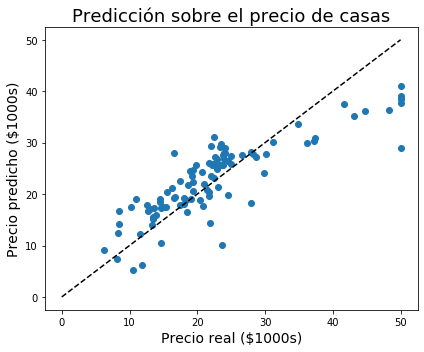

In [41]:
# Plot real prices vs predicted
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.title('Boston house prices prediction', fontsize=18)
plt.xlabel('Real price ($1000s)', fontsize=14)
plt.ylabel('Predicted price ($1000s)', fontsize=14)
plt.tight_layout()

In [42]:
# Again but using the variables that have less correlation with the price.

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B']]
y = df['price']

In [43]:
# Split variables
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X,

                                                    y,

                                                    test_size=0.2,

                                                    random_state=1)

In [44]:
# Normalize
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [45]:
#Fit model
lm.fit(X_train,y_train)

#Predict
y_pred=lm.predict(X_test)

In [46]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print(f'The normalized mean absolute error is:  {(mae/y_test.mean()*100):.2f}%')



The normalized mean absolute error is:  23.89%


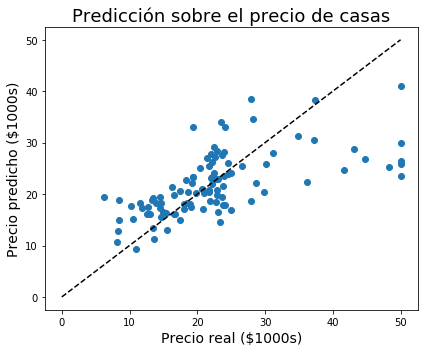

In [47]:
# Plot real prices vs predicted
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.title('Boston house prices prediction', fontsize=18)
plt.xlabel('Real price ($1000s)', fontsize=14)
plt.ylabel('Predicted price ($1000s)', fontsize=14)
plt.tight_layout()

#### Conclusion: in this case it is best to use all the variables included in the dataset rather than make a selection of some of them. A normalized mean absolute error of 16.61% was achieved.

## Tensorflow (keras)

In [48]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [67]:
'''In this case we will use a neural network consisting of 1 input layer with all dependent variables,
1 output layer where the dependent variable is predicted and 5 deep layers with different number of nodes.'''

# Divide the dataset in dependent and independent
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT']]
y = df['price']

# Split it in 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)


print("Number of training samples: ", X_test.shape[0])
print("Number of testing samples: ", X_train.shape[0])

Number of training samples:  102
Number of testing samples:  404


In [68]:
# Normalize
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
# Define the architecture of the neuralnet
def build_model():
    model = keras.Sequential([
        layers.Dense(23, activation='relu', input_dim=X_train.shape[1]),
        layers.Dense(20, activation='relu'),
        layers.Dense(15, activation='relu'),
        layers.Dense(5, activation='relu'),
        layers.Dense(3, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model

model = build_model()

In [71]:
# Visualize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 23)                322       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 1,219
Trainable params: 1,219
Non-trainable params: 0
______________________________________________________

In [72]:
# Test the model with a small example
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.23905677],
       [-0.4000271 ],
       [-0.63034314],
       [-0.365193  ],
       [-0.46718645],
       [-0.3470611 ],
       [-0.3510484 ],
       [-0.4607812 ],
       [-0.23037845],
       [-0.36852577]], dtype=float32)

In [73]:
# Create a function that returns a dot '.' for each era that the model runs. It is useful to know when is running.
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')


# Number of epochs
epochs = 1000

# Fit the model to the training set
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [74]:
# Create a df with the values of mae and mse
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,3.713260,1.452596,3.713260,11.958139,2.318927,11.958139,995
996,4.175446,1.537927,4.175446,10.510295,2.219808,10.510295,996
997,3.897279,1.504923,3.897279,11.525443,2.424851,11.525443,997
998,3.638825,1.418087,3.638825,12.038920,2.253192,12.038920,998
999,4.016747,1.488346,4.016747,12.598807,2.628417,12.598807,999


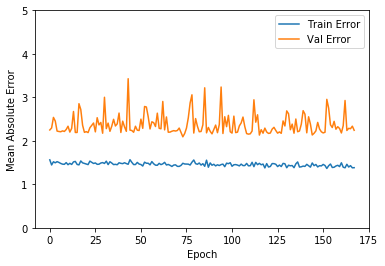

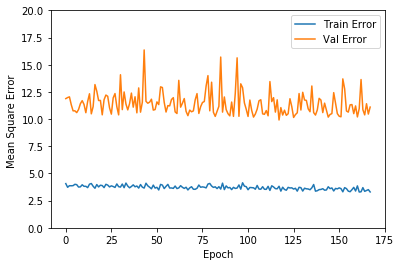

In [102]:
# Create a function for plotting training and validation errors
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.plot(hist['epoch'], hist['mae'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
             label='Val Error')
    plt.ylim([0, 5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['epoch'], hist['mse'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
             label='Val Error')
    plt.ylim([0, 20])
    plt.legend()
    plt.show()


plot_history(history)


....................................................................................................
....................................................................

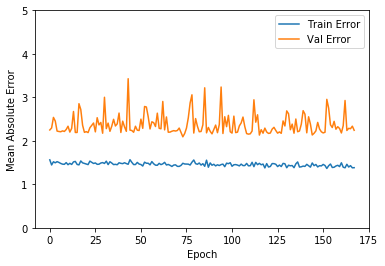

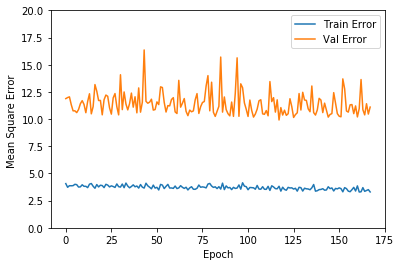

In [79]:
# As the model doesn't improve after a certain number of epochs, we use the EarlyStopping method.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [80]:
# Test the model
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

4/4 - 0s - loss: 10.0556 - mae: 2.3697 - mse: 10.0556
Testing set normalized MAE:  10.50 


In [101]:
# Predict using the test set
y_pred = model.predict(X_test).flatten()
tf_mae = mean_absolute_error(y_test, y_pred)
tf_nmae = tf_mae/y_test.mean()*100

print(f'The normalized mean absolute error is:  {(tf_nmae):.2f}%')

The normalized mean absolute error is:  10.50%


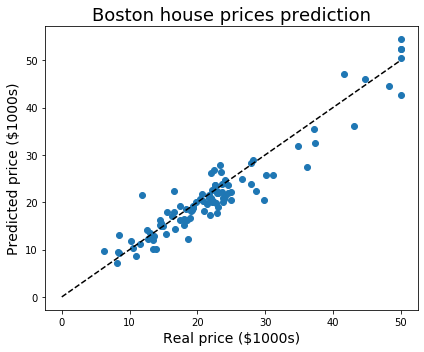

In [92]:
#Plot real price vs predicted price
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.title('Boston house prices prediction', fontsize=18)
plt.xlabel('Real price ($1000s)', fontsize=14)
plt.ylabel('Predicted price ($1000s)', fontsize=14)
plt.tight_layout()

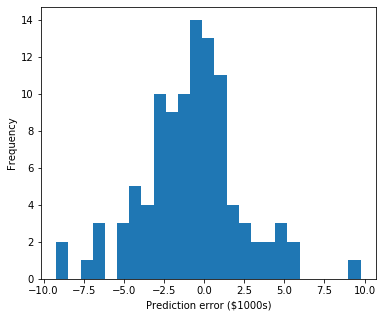

In [94]:
# Error distribution
error = y_pred - y_test
plt.figure(figsize=(6, 5))
plt.hist(error, bins = 25)
plt.xlabel("Prediction error ($1000s)")
_ = plt.ylabel("Frequency")

### Conclusion: implementing a simple neuralnetwork using tensorflow, the prediction error decresed 6.11%.